## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

DESNOYER Jeremy
PIQUET Lucas

Nous nous excusons pour le pdf mais nous n'arrivons pas à l'exporter depuis jupyter. Nous avons LAtex installé mais nous ne comprenons pas le message d'erreur obtenu lors de l'exportation.

In [192]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [193]:
train = np.loadtxt('synth_train.txt')

test = np.loadtxt('synth_test.txt')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [194]:
np.random.shuffle(train)
x_train = train[:, -2:]
x_test = test[:, -2:]
y_train = train[:, 0]
y_test = test[:, 0]

### Train set visualisation

Afin de pouvoir visualiser mes données avec Seaborn nous allons plutot utiliser pandas que numpy.

In [195]:
#Define columns name
columns = ['X', 'Y', 'target']

# Transform data to dataframe
x_train_df = pd.DataFrame(np.concatenate((x_train, y_train[:, newaxis]), axis = 1), columns = columns)

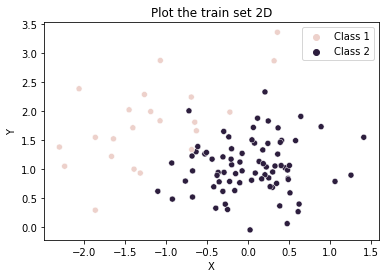

In [200]:
sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)
legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')  # Change the label for the first class
legend.get_texts()[1].set_text('Class 2')  # Change the label for the second class


plt.title('Plot the train set 2D')
plt.show()

Les valeurs semblent être cohérente à ce que l'on observe à l'oeil nu sur les nuages de points affichés au-dessus.

### Train set visualisation

In [225]:
#Define columns name
columns = ['X', 'Y', 'target']

# Transform data to dataframe
x_test_df = pd.DataFrame(np.concatenate((x_test, y_test[:, newaxis]), axis = 1), columns = columns)

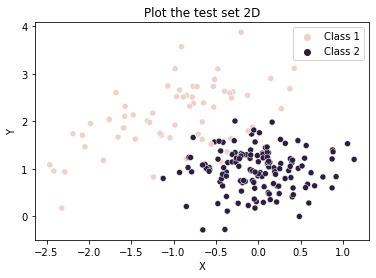

In [226]:
sns.scatterplot(x = 'X', y = 'Y', hue = x_test_df['target'], data = x_test_df)
legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')  # Change the label for the first class
legend.get_texts()[1].set_text('Class 2')  # Change the label for the second class


plt.title('Plot the test set 2D')
plt.show()

## Estimatimation pi_k,  mu_k and sigma


### pi

In [145]:
N = x_train.shape[0]
#Pi
N1 = np.count_nonzero(y_train == 1)
N2 = N-N1 
pi_1, pi_2 = N1 / N , N2 / N 

### mu

In [202]:
# Mean 
x_mean_1, x_mean_2, y_mean_1, y_mean_2 = x_train_df[x_train_df['target'] == 1].sum()[0] / N1, x_train_df[x_train_df['target'] == 2].sum()[0] / N2 , x_train_df[x_train_df['target'] == 1].sum()[1] / N1, x_train_df[x_train_df['target'] == 2].sum()[1] / N2


mu_1  = np.array([[x_mean_1], [y_mean_1]]).T
mu_2  = np.array([[x_mean_2], [y_mean_2]]).T

### Common averaged covariance sigma

In [204]:
# Compute the common averaged covariance sigma

cov_1, cov_2  = np.cov(x_train_df[x_train_df['target'] == 1].iloc[:, :2] , rowvar=False), np.cov(x_train_df[x_train_df['target'] == 2].iloc[:, :2], rowvar=False)

sigma = (cov_1 + cov_2)/N


# 1- LDA

In [189]:
#compute reverse sigma
sigma_rev = np.linalg.inv(sigma)

## Plot the test set with decision boudary

First, we had classified data using the Hyperplan. Then, we understood the way suggest in the notebook guidelines.

In [109]:
X_line = np.linspace(-2.5, 1.5, 100)


w = sigma_rev @ (mu_1- mu_2).T
b = np.log(N1/N2) - 0.5*(mu_1 @ sigma_rev @ mu_1.T - mu_2 @ sigma_rev @ mu_2.T)

# Plot the Hyperplan 
H = -(w[0,0]/w[1,0])* X_line - (b[0] / w[1,0])


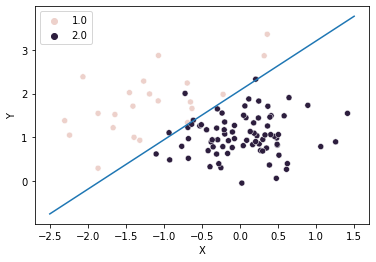

In [170]:
sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)
sns.lineplot(x= X_line, y= H)
plt.show()

Now, the second method closer to the notebook guidelines.

In [ ]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
#x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
x = np.column_stack((X1.flatten('F'), X2.flatten('F')))
#N = size(x,axis=0)




# Then compute the sampled prediction class_L for each couple (X1,X2)

We compute the log posterior probability

In this case, no need to loop because LDA is linear

In [ ]:
w1 = (sigma_rev @ (mu_1).T) 
w2 = (sigma_rev @ (mu_2).T) 


b1 = np.log(pi_1) - 0.5*(mu_1 @ sigma_rev @ mu_1.T)
b2 = np.log(pi_2) - 0.5*(mu_2 @ sigma_rev @ mu_2.T)


# Compute log probability to belong to each class
# Size 10000 x 1
log_post_1 = (w1.T @ x.T).T + b1
log_post_2 = (w2.T @ x.T).T + b2



Classification decision

In [ ]:
# Classification decision
class_L = np.where(log_post_1 > log_post_2, 0, 1)

### Plot the regions of decision and compare them to the train set

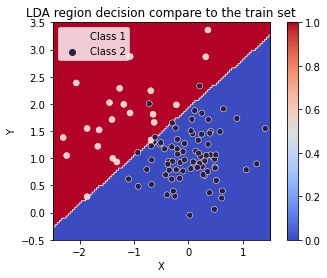

In [240]:
# For graphical representation  use code below for instance :
# Resize decision in 100 x x100
class_L = class_L.reshape(Nx2, Nx1)


plt.imshow(class_L, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap='coolwarm')

# Add the test set scatterplot 
scatter = sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)

# Retrieve heatmap limits
x_min, x_max = np.min(x1), np.max(x1)
y_min, y_max = np.min(x2), np.max(x2)

# Define axis limits for the scatterplot
scatter.set_xlim(x_min, x_max)
scatter.set_ylim(y_min, y_max)

legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')  # Change the label for the first class
legend.get_texts()[1].set_text('Class 2')  # Change the label for the second class


plt.title('LDA region decision compare to the train set')


plt.colorbar() 
plt.show()

As we can see, just above we have some data misclassified. We will show how much using a confusion matrix.

In [214]:
# Compute log probability to belong to each class on the train set
# Size 100 x 1
log_post_1 = (w1.T @ x_train.T).T + b1
log_post_2 = (w2.T @ x_train.T).T + b2

y_pred = np.where(log_post_1 > log_post_2, 0, 1)


## Train Set Confusion matrix 

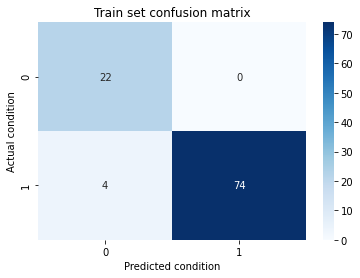

In [222]:
# Confusion matrix train
confusion = confusion_matrix(y_train, y_pred+1)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Train set confusion matrix')
plt.show()

As in the last plot, only 4 values are misclassified. All of these values belong to the first class and the classifier predicts class 2. So, the classifier seems to over-classified data in class 2. Let's see if the test set confirms this hypothesis.

# TEST SET

First Method

## Plot the test set with decision boudary

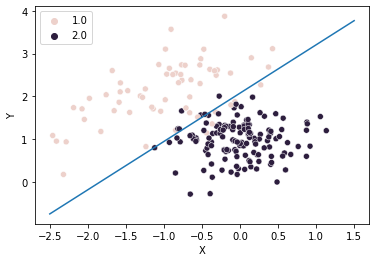

In [228]:
sns.scatterplot(x = 'X', y = 'Y', hue = test_df['target'], data = test_df)
sns.lineplot(x= X_line, y= H)
plt.show()

Second Method

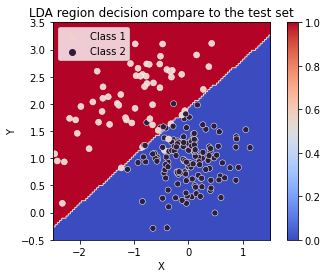

In [239]:
# For graphical representation  use code below for instance :
# Resize decision in 100 x x100
class_L = class_L.reshape(Nx2, Nx1)


plt.imshow(class_L, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap='coolwarm')

# Add the test set scatterplot 
scatter = sns.scatterplot(x = 'X', y = 'Y', hue = x_test_df['target'], data = x_test_df)

# Retrieve heatmap limits
x_min, x_max = np.min(x1), np.max(x1)
y_min, y_max = np.min(x2), np.max(x2)

# Define axis limits for the scatterplot
scatter.set_xlim(x_min, x_max)
scatter.set_ylim(y_min, y_max)

legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')  # Change the label for the first class
legend.get_texts()[1].set_text('Class 2')  # Change the label for the second class


plt.title('LDA region decision compare to the test set')


plt.colorbar() 
plt.show()

In [219]:
# Test
N_test = x_test.shape[0]

# Compute log probability to belong to each class on the train set
# Size 200 x 1
log_post_1_test = (w1.T @ x_test.T).T + b1
log_post_2_test = (w2.T @ x_test.T).T + b2

y_pred_test = np.where(log_post_1_test > log_post_2_test, 0, 1)
print(log_post_1_test.shape)



(200, 1)


## Test Set Confusion matrix 

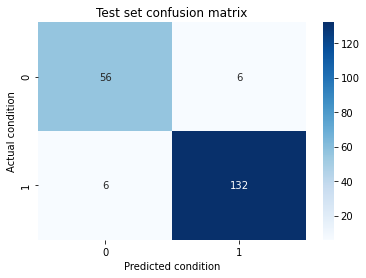

In [223]:
# Confusion matrix test
confusion_test = confusion_matrix(target_test, y_pred_test+1)

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Test set confusion matrix')
plt.show()

1 -We get more data misclassified here, but the set is larger, our LDA generalize quite well on this data. Hovewer, to confirm this, we should have to a context to understand if this classification is sufficient. 

2 - The repartion of the errros is much more balanced than on the train set. So, the first hypothesis was probably wrong.

# 2 - QDA

### Empirical covariance matrices sigma

In [230]:
# sigma
sigma_1, sigma_2 = np.cov(x_train_df[x_train_df['target'] == 1].iloc[:, :2] , rowvar=False), np.cov(x_train_df[x_train_df['target'] == 2].iloc[:, :2], rowvar=False)

# inverse sigma
inv_sigma_1 = np.linalg.inv(sigma_1)
inv_sigma_2 = np.linalg.inv(sigma_2)


This time we need a loop to compute log posterior probabilities.

In [233]:
A1 = np.log(pi_1) - 0.5*log(np.linalg.det(inv_sigma_1))
A2 = np.log(pi_2) - 0.5*log(np.linalg.det(inv_sigma_2))


# Compute log probability to belong to each class

log_post_QDA1 = np.zeros((10000,1))
log_post_QDA2 = np.zeros((10000,1))


for i in range(x.shape[0]):
    log_post_QDA1[i] = A1 - 0.5*(x[i,:] @ inv_sigma_1 @ x[i,:].T - x[i,:] @ inv_sigma_1 @ mu_1.T - mu_1 @ inv_sigma_1 @ x[i,:].T + mu_1 @ inv_sigma_1 @ mu_1.T)
    log_post_QDA2[i] = A2 - 0.5*(x[i,:] @ inv_sigma_2 @ x[i,:].T - x[i,:] @ inv_sigma_2 @ mu_2.T - mu_2 @ inv_sigma_2 @ x[i,:].T + mu_2 @ inv_sigma_2 @ mu_2.T)





Classification decision

In [234]:
class_L_QDA = np.where(log_post_QDA1 > log_post_QDA2, 0, 1)

## Train set

### Plot the regions of decision and compare them to the train set

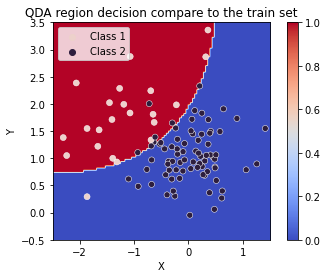

In [252]:
# For graphical representation  use code below for instance :
class_L_QDA = class_L_QDA.reshape(Nx2, Nx1)


plt.imshow(class_L_QDA, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap='coolwarm')


# Add the test set scatterplot 
scatter = sns.scatterplot(x = 'X', y = 'Y', hue = x_train_df['target'], data = x_train_df)

# Retrieve heatmap limits
x_min, x_max = np.min(x1), np.max(x1)
y_min, y_max = np.min(x2), np.max(x2)

# Define axis limits for the scatterplot
scatter.set_xlim(x_min, x_max)
scatter.set_ylim(y_min, y_max)

legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')
legend.get_texts()[1].set_text('Class 2')  


plt.title('QDA region decision compare to the train set')


plt.colorbar() 
plt.show()

In [255]:
# Compute log probability to belong to each class

log_post_QDA1_train = np.zeros((100,1))
log_post_QDA2_train = np.zeros((100,1))


for i in range(100):
    log_post_QDA1_train[i] = A1 - 0.5*(x_train[i,:] @ inv_sigma_1 @ x_train[i,:].T - x_train[i,:] @ inv_sigma_1 @ mu_1.T - mu_1 @ inv_sigma_1 @ x_train[i,:].T + mu_1 @ inv_sigma_1 @ mu_1.T)
    log_post_QDA2_train[i] = A2 - 0.5*(x_train[i,:] @ inv_sigma_2 @ x_train[i,:].T - x_train[i,:] @ inv_sigma_2 @ mu_2.T - mu_2 @ inv_sigma_2 @ x_train[i,:].T + mu_2 @ inv_sigma_2 @ mu_2.T)


Classification decision

In [256]:
# Classification decision
y_pred_train = np.where(log_post_QDA1_train > log_post_QDA2_train, 0, 1)

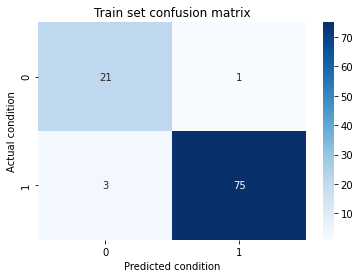

In [257]:
# Confusion matrix train
confusion_train = confusion_matrix(y_train, y_pred_train+1)

sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Train set confusion matrix')
plt.show()

## Test set

### Plot the regions of decision and compare them to the test set

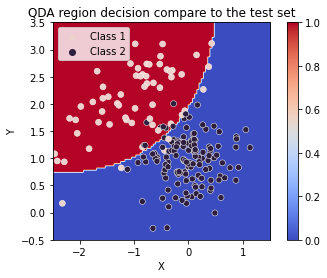

In [259]:
# For graphical representation  use code below for instance :
class_L_QDA = class_L_QDA.reshape(Nx2, Nx1)


plt.imshow(class_L_QDA, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap='coolwarm')


# Add the test set scatterplot 
scatter = sns.scatterplot(x = 'X', y = 'Y', hue = x_test_df['target'], data = x_test_df)

# Retrieve heatmap limits
x_min, x_max = np.min(x1), np.max(x1)
y_min, y_max = np.min(x2), np.max(x2)

# Define axis limits for the scatterplot
scatter.set_xlim(x_min, x_max)
scatter.set_ylim(y_min, y_max)

legend = plt.legend()
legend.get_texts()[0].set_text('Class 1')
legend.get_texts()[1].set_text('Class 2')  


plt.title('QDA region decision compare to the test set')


plt.colorbar() 
plt.show()

In [266]:
# Compute log probability to belong to each class

log_post_QDA1_test = np.zeros((200,1))
log_post_QDA2_test = np.zeros((200,1))


for i in range(100):
    log_post_QDA1_test[i] = A1 - 0.5*(x_test[i,:] @ inv_sigma_1 @ x_test[i,:].T - x_test[i,:] @ inv_sigma_1 @ mu_1.T - mu_1 @ inv_sigma_1 @ x_test[i,:].T + mu_1 @ inv_sigma_1 @ mu_1.T)
    log_post_QDA2_test[i] = A2 - 0.5*(x_test[i,:] @ inv_sigma_2 @ x_test[i,:].T - x_test[i,:] @ inv_sigma_2 @ mu_2.T - mu_2 @ inv_sigma_2 @ x_test[i,:].T + mu_2 @ inv_sigma_2 @ mu_2.T)


In [267]:
# Classification decision
y_pred_test = np.where(log_post_QDA1_test > log_post_QDA2_test, 0, 1)
print(y_pred_test.shape)

(200, 1)


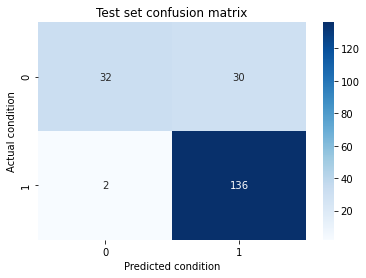

In [268]:
# Confusion matrix train
confusion_test = confusion_matrix(y_test, y_pred_test+1)

sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Test set confusion matrix')
plt.show()

In [ ]:
#

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




# LDA

In [273]:
# Create a classifer for LDA
clf_LDA = LinearDiscriminantAnalysis()

# Train our classifier with our train set
clf_LDA.fit(x_train, y_train-1)

# Make predictions for the train set 
y_pred_LDA_train = clf_LDA.predict(x_train)

## Train set

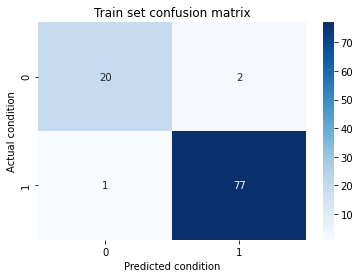

In [278]:
# Confusion matrix train
confusion = confusion_matrix(y_train-1, y_pred_LDA_train)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Train set confusion matrix')
plt.show()

## Test set

In [277]:
# Make predictions for the train set 
y_pred_LDA_test = clf_LDA.predict(x_test)

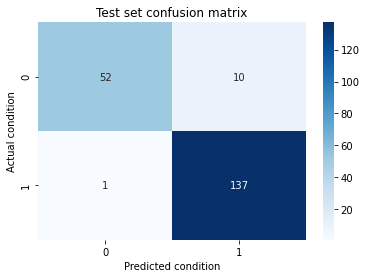

In [279]:
# Confusion matrix train
confusion = confusion_matrix(y_test-1, y_pred_LDA_test)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Test set confusion matrix')
plt.show()

In [283]:
# Create a classifer for QDA
clf_QDA = QuadraticDiscriminantAnalysis()

# Train our classifier with our train set
clf_QDA.fit(x_train, y_train-1)

# Make predictions for the train set 
y_pred_QDA_train = clf_QDA.predict(x_train)

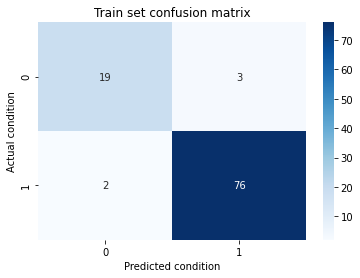

In [284]:
# Confusion matrix train
confusion = confusion_matrix(y_train-1, y_pred_QDA_train)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Train set confusion matrix')
plt.show()

In [285]:
# Make predictions for the train set 
y_pred_QDA_test = clf_QDA.predict(x_test)

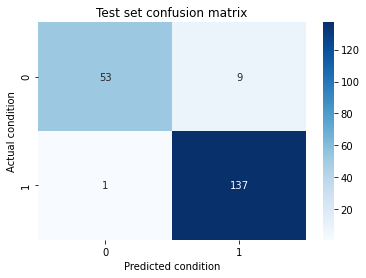

In [287]:
# Confusion matrix train
confusion = confusion_matrix(y_test-1, y_pred_QDA_test)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted condition')
plt.ylabel('Actual condition')
plt.title('Test set confusion matrix')
plt.show()